In [43]:
# Importing the necessary libraries to run scripts

import pandas as pd
import time
import scipy.stats as stats
import numpy as np
import pathlib as plb 

from skimage.io import imread, imsave, imshow
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops, regionprops_table
from skimage.morphology import closing, square, remove_small_objects

import matplotlib.pyplot as plt
import seaborn as sns

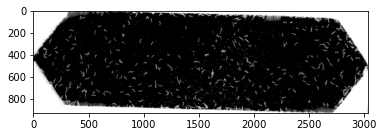

In [36]:
image = imread('D:/NP_manuscript/Images/crops/DMSO/MS1_002_3B.tiff')
plt.imshow(image, cmap='gray')
plt.show()

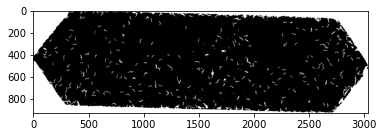

In [37]:
thresh = threshold_otsu(image)
binarized = image > thresh
plt.imshow(binarized, cmap='gray')
plt.show()


In [38]:

# label image regions
label_image = label(binarized)

props = regionprops_table(label_image, properties=('label','centroid', 'bbox', 'area'))
dff=pd.DataFrame(props)

df_area = dff.sort_values(by=['area'], ascending=False)
image_center = (int(label_image.shape[1]/2),int(label_image.shape[0]/2))

worms = dff.rename(columns= {'centroid-0': 'Y', 'centroid-1':'X'})

filt_worm=worms[worms['area']<2500]
filtered_worm=filt_worm[filt_worm['area']>50]

print(len(filtered_worm))

252


In [39]:


## Assign features to zones of the plate
left_area_boundary = int(4/9*int(label_image.shape[1]))#int(3424*4/9) #8000
#print(left_area_boundary)
right_area_boundary = int(5/9*int(label_image.shape[1]))#int(3424*5/9)
#print(right_area_boundary)

left_side_worms = filtered_worm[filtered_worm['X'] <= left_area_boundary]
middle_w = filtered_worm[filtered_worm['X'] < right_area_boundary]
middle_worms = middle_w[middle_w['X'] >left_area_boundary]
right_side_worms = filtered_worm[filtered_worm['X'] >= right_area_boundary]

## Calculate chemotaxis index
worms_in_left_region = len(left_side_worms)
worms_in_middle_region = len(middle_worms)
worms_in_right_region = len(right_side_worms)
total_worms_found = len(filtered_worm)
#print('Left; ' + str(worms_in_left_region) + '   Right: ' + str(worms_in_right_region))
print(total_worms_found)

252


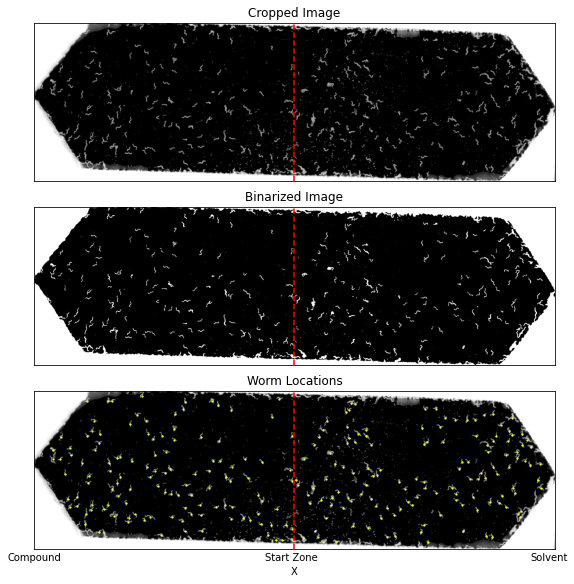

In [77]:
labels = ['Compound', '', '', 'Start Zone', '', '', 'Solvent']
ticks = [0.0, 500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0]
center = int(label_image.shape[1]/2)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 8), constrained_layout=True, sharex=True, sharey=True)
plt.yticks([]) 

axes[0].imshow(image/255, cmap='gray')#[y_min:y_max, x_min:x_max])
axes[0].set_title('Cropped Image')
axes[0].axvline(x=center, color='r', linestyle='--')
axes[0].tick_params(axis=u'both', which=u'both',length=0)

axes[1].imshow(binarized/255, cmap = 'gray')#[y_min:y_max, x_min:x_max])
axes[1].set_title('Binarized Image')
axes[1].axvline(x=center, color='r', linestyle='--')
axes[1].tick_params(axis=u'both', which=u'both',length=0)

axes[2].imshow(image/255, cmap = 'gray')#[y_min:y_max, x_min:x_max])
axes[2].set_title('Worm Locations')
sns.scatterplot(x='X', y='Y', ax=axes[2], data=filtered_worm, s=4, color='Yellow')
axes[2].axvline(x=center, color='r', linestyle='--')


axes[2].set_xticks(ticks)
axes[2].set_xticklabels(labels)
axes[2].tick_params(axis=u'both', which=u'both',length=0)

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('D:/NP_manuscript/figs/Fig3_iaFlow.svg', dpi=1200)


In [41]:
filt_worm.head()

,label,Y,X,bbox-0,bbox-1,bbox-2,bbox-3,area
2,3,26.505495,628.450549,11,619,43,642,182
3,4,14.000000,838.500000,13,838,16,840,6
4,5,25.000000,952.000000,25,952,26,953,1
5,6,26.500000,1077.500000,25,1076,29,1080,12
6,7,38.500000,1251.500000,38,1251,40,1253,4
